In [13]:
%load_ext autoreload
%autoreload 2

In [267]:
# import packages

import sys

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import joblib


from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.signal import savgol_filter


sys.path.append('../src')
from utilities import baseline_accuracy
from utilities import dataplotmelt
from utilities import test_model
from utilities import model_optimization
from utilities import train_model
from utilities import test_model
from utilities import variable_importance_df
from utilities import add_label_band
from utilities import montecarlo_crossvalidation


from preprocessing import baseline_gridsearch_SNV
from preprocessing import baseline_gridsearch
from preprocessing import baseline_gridsearch_RNV
from preprocessing import baseline_gridsearch_MSC

from preprocessing import prepo_results_windows
from preprocessing import final_df_preprocessing
from preprocessing import boxplot_preprocessing
from preprocessing import baseline_gridsearch_2

In [277]:
tsetse_data = pd.read_csv("../data/processed/TseTse_processed_wo_outliers.csv")


In [278]:
tsetse_females_thorax = tsetse_data.loc[(tsetse_data['Sex'] == 'f') & (tsetse_data['Tissue'] == 'Thorax')]

tsetse_females_head = tsetse_data.loc[(tsetse_data['Sex'] == 'f') & (tsetse_data['Tissue'] == 'Head')]

In [382]:
X_females_thorax = tsetse_females_thorax.loc[:,"1800":"600"]
X_females_head = tsetse_females_head.loc[:,"1800":"600"]

y_females_thorax = tsetse_females_thorax.loc[:,"Age"]
y_females_head = tsetse_females_head.loc[:,"Age"]

In [383]:
X_females_thorax.head()

,1800,1798,1796,1794,1792,1790,1788,1786,1784,1782,...,618,616,614,612,610,608,606,604,602,600
2,0.02081,0.02091,0.02111,0.02139,0.02154,0.02164,0.02181,0.02210,0.02243,0.02270,...,0.29401,0.29563,0.29708,0.29812,0.29867,0.29919,0.30034,0.30184,0.30339,0.30509
5,0.02161,0.02163,0.02163,0.02169,0.02168,0.02162,0.02162,0.02171,0.02181,0.02190,...,0.23665,0.23804,0.23935,0.24036,0.24116,0.24171,0.24200,0.24249,0.24366,0.24535
7,0.02286,0.02300,0.02321,0.02336,0.02332,0.02332,0.02347,0.02371,0.02387,0.02391,...,0.30526,0.30673,0.30806,0.30909,0.31012,0.31107,0.31184,0.31286,0.31430,0.31604
10,0.02189,0.02194,0.02205,0.02223,0.02225,0.02233,0.02254,0.02272,0.02281,0.02290,...,0.27012,0.27135,0.27248,0.27339,0.27384,0.27421,0.27493,0.27597,0.27720,0.27847
13,0.02473,0.02478,0.02481,0.02498,0.02506,0.02511,0.02519,0.02527,0.02532,0.02535,...,0.28437,0.28569,0.28698,0.28793,0.28849,0.28914,0.29001,0.29123,0.29285,0.29429


In [384]:
# Lower resolution
X_females_thorax_low = X_females_thorax[X_females_thorax.columns[::4]]

In [385]:
# Split train and test
Xf_th_train, Xf_th_test, yf_th_train, yf_th_test = train_test_split(X_females_thorax_low, y_females_thorax, test_size=0.2, shuffle=True, random_state=124,stratify=y_females_thorax)

Xf_hd_train, Xf_hd_test, yf_hd_train, yf_hd_test = train_test_split(X_females_head, y_females_head, test_size=0.2, shuffle=True, random_state=124, stratify=y_females_head)

In [386]:
yf_th_train.value_counts()

Age
3d    108
7w     93
5w     77
Name: count, dtype: int64

In [387]:
# Undersampling classes

from imblearn.under_sampling import RandomUnderSampler


under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(Xf_th_train, yf_th_train)

In [388]:
y_res.value_counts()

Age
3d    77
5w    77
7w    77
Name: count, dtype: int64

In [212]:
## preprocessing thorax

# define the windows for savgol smoothing
windows=[9,11,21]

In [259]:
# baseline gridsearch2 (no standard scaler, no LDA)

# raw

total_zero_order = []
for i in windows: 
    scores = baseline_gridsearch(X_res, y_res,i,0)
    total_zero_order.append(scores)

total_first_order = []
for i in windows: 
    scores = baseline_gridsearch(X_res, y_res,i,1)
    total_first_order.append(scores)

total_second_order = []
for i in windows: 
    scores = baseline_gridsearch(X_res, y_res,i,2)
    total_second_order.append(scores)



# SNV

snv_zero_order = []
for i in windows: 
    scores = baseline_gridsearch_SNV(X_res, y_res,i,0)
    snv_zero_order.append(scores)

snv_first_order = []
for i in windows: 
    scores = baseline_gridsearch_SNV(X_res, y_res,i,1)
    snv_first_order.append(scores)

snv_second_order = []
for i in windows: 
    scores = baseline_gridsearch_SNV(X_res, y_res,i,2)
    snv_second_order.append(scores)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for eac

In [260]:
# Join the results for each preprocessing
raw_results = prepo_results_windows(total_zero_order, total_first_order, total_second_order,"raw")
snv_results = prepo_results_windows(snv_zero_order , snv_first_order, snv_second_order,"snv" )

In [261]:
# concatenate all the preprocessing metdhos
dataframes = [raw_results, snv_results]
df_concat = pd.concat(dataframes)

In [262]:
# change column names, tranform to long format and export to csv
preprocesing_final_results = final_df_preprocessing(df_concat)

In [263]:
# Calculate the mean accuracy for each combination and print the best model
preprocessing_results_df = preprocesing_final_results.groupby(["Model", "Preprocessing","Derivative", "Window"])["Accuracy"].mean().reset_index()
bestmodel = preprocessing_results_df.loc[preprocessing_results_df["Accuracy"].idxmax()]
print("Best model is:\n", bestmodel)

Best model is:
 Model                  RF
Preprocessing         snv
Derivative              0
Window                 11
Accuracy         0.811429
Name: 82, dtype: object


In [264]:
preprocessing_results_df.sort_values(by="Accuracy")

,Model,Preprocessing,Derivative,Window,Accuracy
94,SGD,raw,1,11,0.350000
97,SGD,raw,2,11,0.355714
98,SGD,raw,2,21,0.364286
44,LR,raw,2,21,0.408571
93,SGD,raw,1,9,0.410000
...,...,...,...,...,...
46,LR,snv,0,11,0.801429
45,LR,snv,0,9,0.802857
47,LR,snv,0,21,0.805714
81,RF,snv,0,9,0.807143


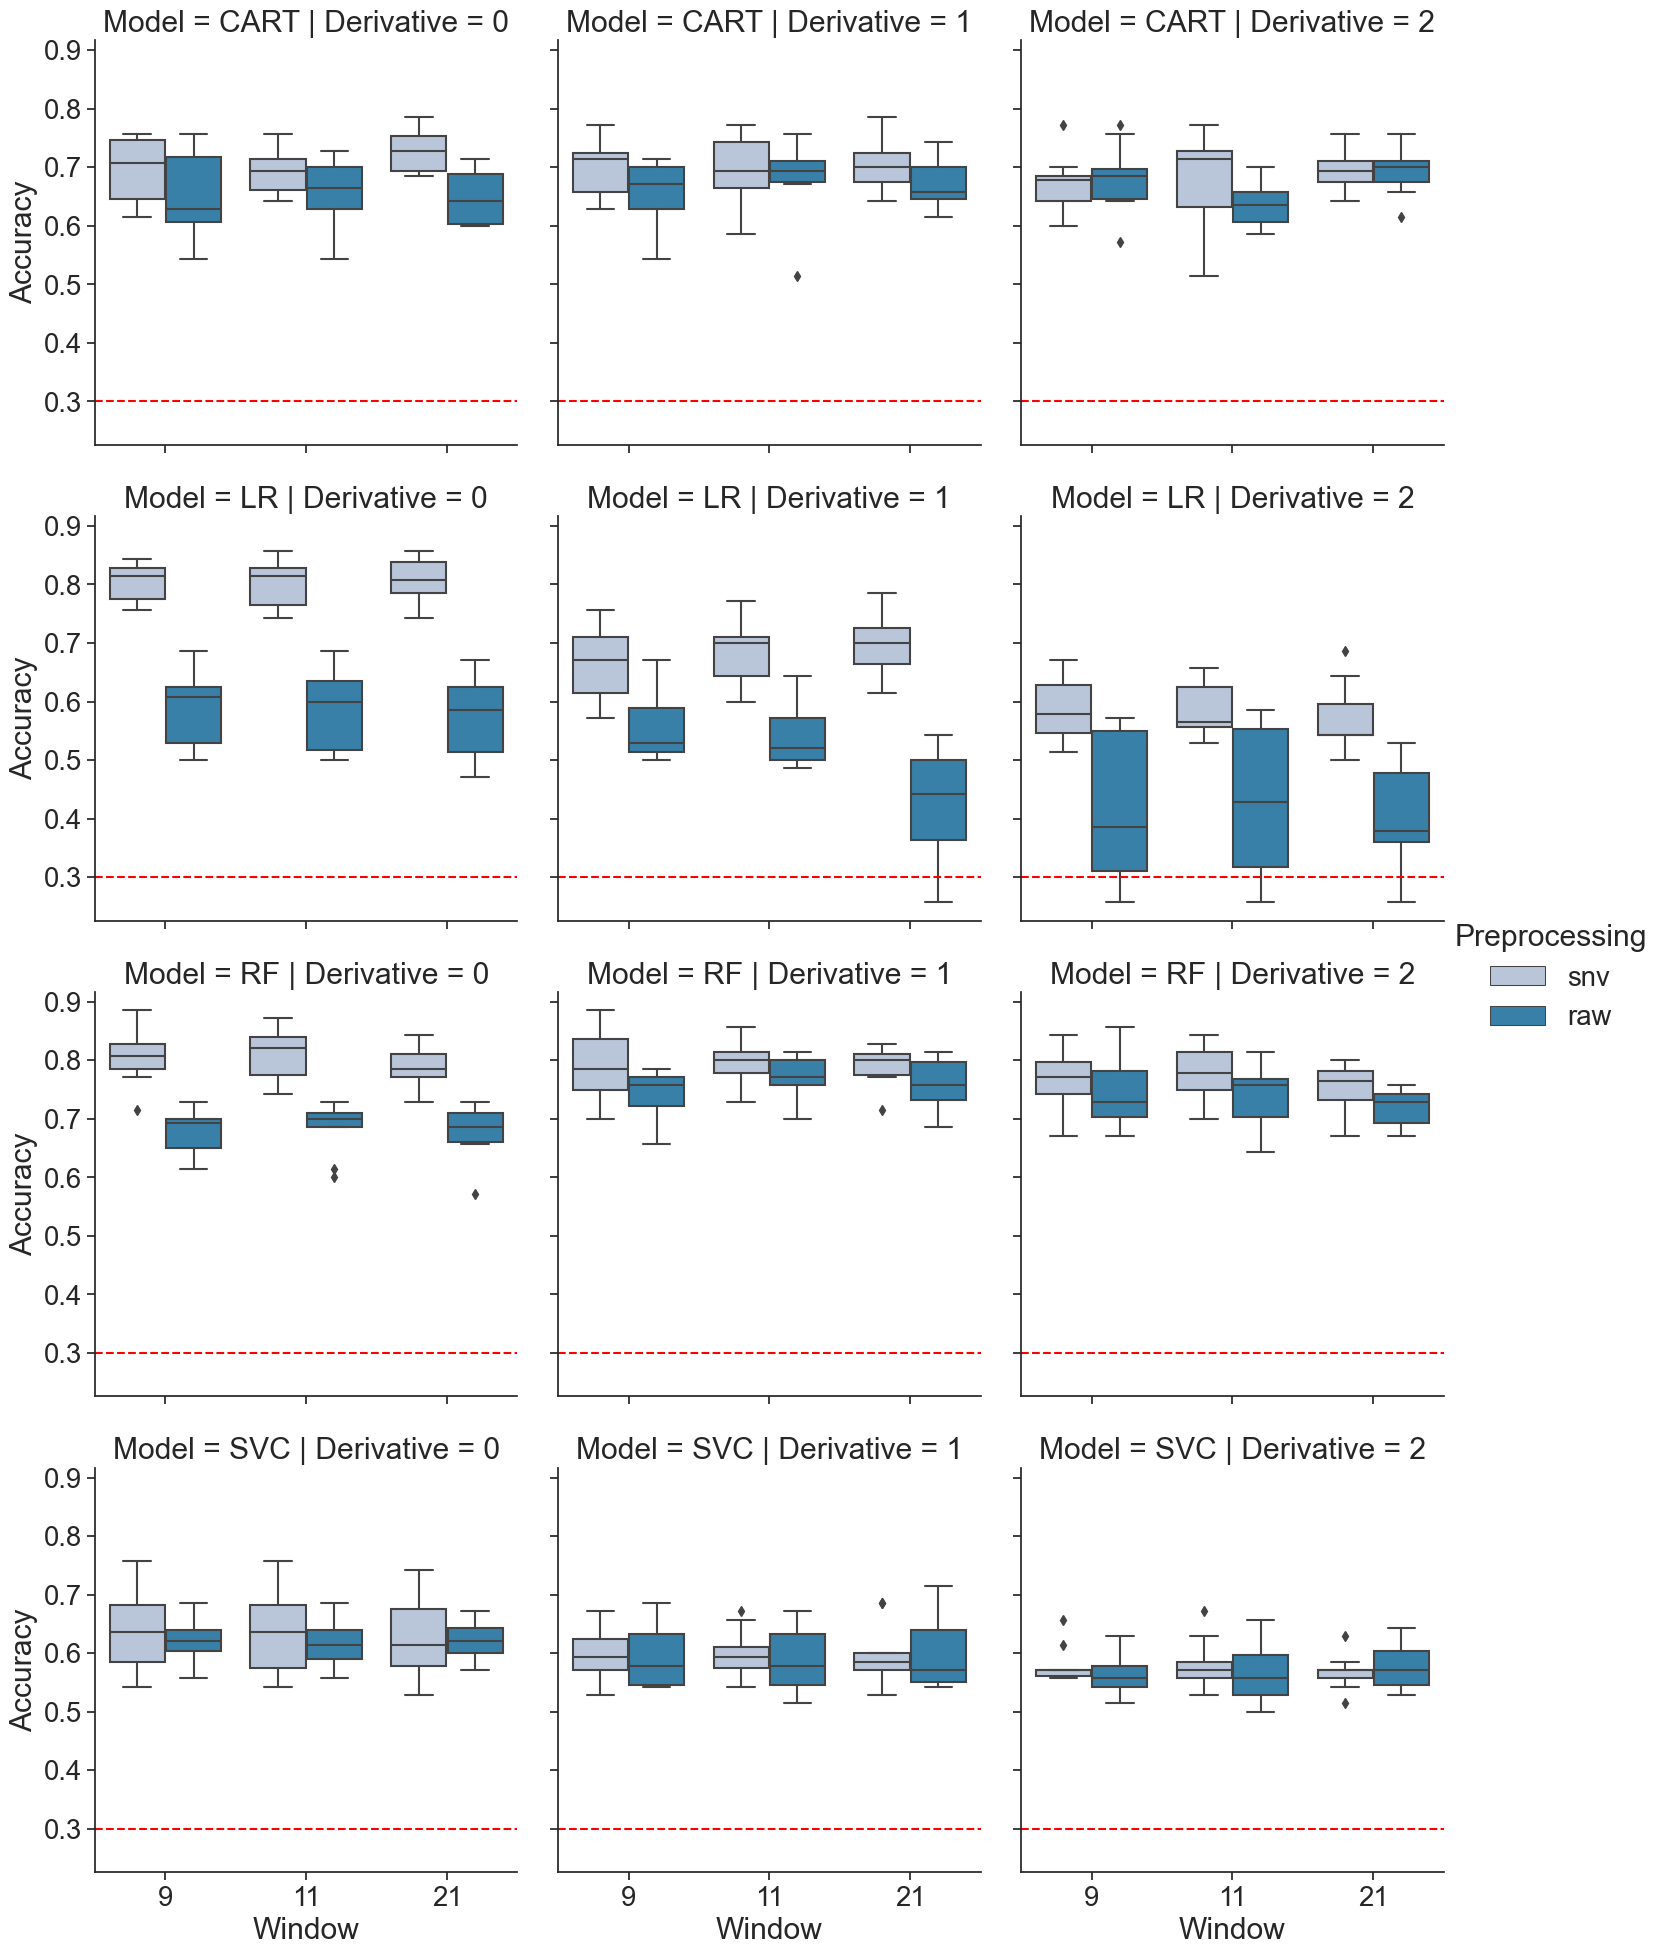

In [276]:
boxplot_preprocessing(preprocesing_final_results.loc[preprocesing_final_results['Model'].isin(['RF','SVC', 'LR', 'CART'])])
#plt.savefig("/Users/mauropazmino/Documents/University/TseTse_Project/Pilot/tsetse_MIRS/results/plots/preprocesing.png", dpi=600)

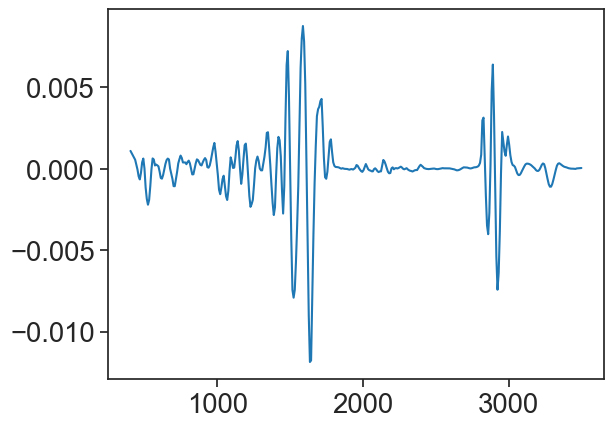

In [336]:
X_female_thorax_sg = savgol_filter(X_females_thorax_low, deriv=0, window_length=9, polyorder=3)

X_female_thorax_sg1 = savgol_filter(X_females_thorax_low, deriv=1, window_length=9, polyorder=3)

X_female_thorax_sg2 = savgol_filter(X_females_thorax_low, deriv=2, window_length=9, polyorder=3)

waveNumslist = X_females_thorax_low.columns.values.tolist()
wavenumbers = [int(x) for x in waveNumslist]

#plt.plot(wavenumbers, np.mean(X_female_thorax_sg, axis=0))
#plt.plot(wavenumbers, np.mean(X_female_thorax_sg1, axis=0))
plt.plot(wavenumbers, np.mean(X_female_thorax_sg2, axis=0))


In [458]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.signal import savgol_filter
from sklearn.model_selection import cross_val_score
from transformers import SavitzkyGolay
from sklearn.svm import SVC
from transformers import StandardNormalVariate
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', SavitzkyGolay()), ('clf', RandomForestClassifier())])

#pipe = Pipeline([('clf', SVC(kernel='rbf'))])

#X_res_sg = savgol_filter(X_res, deriv=2, window_length=9, polyorder=3)
scores_1 = cross_val_score(pipe, X_res, y_res, cv=10)
scores_1

array([0.79166667, 0.73913043, 0.7826087 , 0.7826087 , 0.86956522,
       0.65217391, 0.7826087 , 0.7826087 , 0.65217391, 0.65217391])

In [461]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 

# param_grid={'max_depth':[80,90,100,110],
#               'n_estimators':[10,100,200],
#               'max_features':[1,3,5,7],
#               'min_samples_leaf':[3, 4, 5],
#               'min_samples_split':[0.5,0.9]
#            }

param_grid = {
    'clf__bootstrap': [True],
    'clf__max_depth': [80, 90, 100, 110],
    'clf__max_features': [2, 3],
    'clf__min_samples_leaf': [3, 4, 5],
    'clf__min_samples_split': [8, 10, 12],
    'clf__n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(pipe, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 1)

grid_search.fit(X_res, y_res)
grid_search.best_params_

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


{'clf__bootstrap': True,
 'clf__max_depth': 90,
 'clf__max_features': 3,
 'clf__min_samples_leaf': 3,
 'clf__min_samples_split': 10,
 'clf__n_estimators': 300}

In [468]:
pd.DataFrame(grid_search.cv_results_).sort_values(by=["std_test_score",'mean_test_score']).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__bootstrap,param_clf__max_depth,param_clf__max_features,param_clf__min_samples_leaf,param_clf__min_samples_split,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
54,0.290920,0.018790,0.017665,0.003997,True,80,3,4,10,300,"{'clf__bootstrap': True, 'clf__max_depth': 80,...",0.724138,0.741379,0.724138,0.719298,0.727238,0.008400,33
84,0.108677,0.007150,0.009298,0.001804,True,90,2,4,8,100,"{'clf__bootstrap': True, 'clf__max_depth': 90,...",0.689655,0.706897,0.706897,0.719298,0.705687,0.010550,228
181,0.179005,0.013745,0.013325,0.005036,True,100,3,3,8,200,"{'clf__bootstrap': True, 'clf__max_depth': 100...",0.706897,0.741379,0.724138,0.701754,0.718542,0.015575,103
12,0.086479,0.006492,0.009149,0.003122,True,80,2,4,8,100,"{'clf__bootstrap': True, 'clf__max_depth': 80,...",0.741379,0.741379,0.724138,0.701754,0.727163,0.016271,35
161,0.171483,0.008738,0.013185,0.003457,True,100,2,4,10,200,"{'clf__bootstrap': True, 'clf__max_depth': 100...",0.724138,0.724138,0.706897,0.684211,0.709846,0.016389,197
264,0.091706,0.007082,0.008708,0.001514,True,110,3,4,8,100,"{'clf__bootstrap': True, 'clf__max_depth': 110...",0.724138,0.706897,0.724138,0.684211,0.709846,0.016389,197
105,0.179094,0.035817,0.010888,0.000756,True,90,2,5,12,200,"{'clf__bootstrap': True, 'clf__max_depth': 90,...",0.689655,0.706897,0.655172,0.684211,0.683984,0.018623,288
73,0.197719,0.027946,0.011268,0.001336,True,90,2,3,8,200,"{'clf__bootstrap': True, 'clf__max_depth': 90,...",0.706897,0.741379,0.706897,0.684211,0.709846,0.020426,197
40,0.095470,0.009595,0.009184,0.002538,True,80,3,3,10,100,"{'clf__bootstrap': True, 'clf__max_depth': 80,...",0.741379,0.741379,0.758621,0.701754,0.735783,0.020869,9
41,0.161414,0.005184,0.010807,0.000780,True,80,3,3,10,200,"{'clf__bootstrap': True, 'clf__max_depth': 80,...",0.741379,0.724138,0.706897,0.684211,0.714156,0.021155,153


In [465]:
pipe = Pipeline([('scaler', SavitzkyGolay()), ('clf', RandomForestClassifier(bootstrap=True,max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300 ))])

In [466]:
pipe.fit(X_res, y_res)
age_females_thorax_sav = test_model(Xf_th_test,yf_th_test,pipe)

Accuracy on test set using the head: 0.7285714285714285


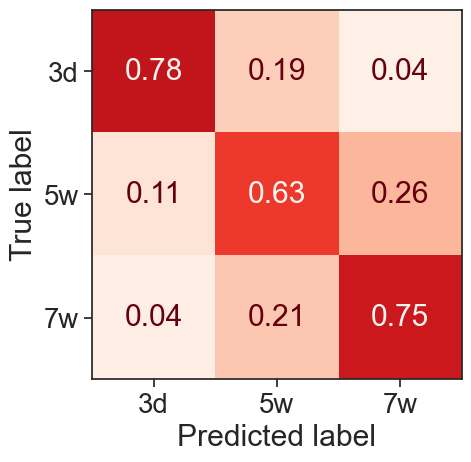

In [467]:
fig, ax = plt.subplots()

disp = ConfusionMatrixDisplay.from_predictions(yf_th_test,age_females_thorax_sav,ax=ax, normalize='true', values_format='.2f', im_kw={'vmin':0, 'vmax':1},colorbar=False, cmap=plt.cm.Reds)

In [409]:
waveNumslist = X_females_thorax_low.columns.values.tolist()
wavenumbers = [int(x) for x in waveNumslist]

In [410]:
feature_importance_RF_feamles = pd.DataFrame(data={'Wavenumbers':wavenumbers, "Feature Importance":pipe['clf'].feature_importances_})

In [411]:
feature_importance_RF_feamles.sort_values(by="Feature Importance", ascending=False).head(10)

,Wavenumbers,Feature Importance
12,1704,0.042740
14,1688,0.038541
17,1664,0.033752
16,1672,0.031602
13,1696,0.028915
11,1712,0.026459
36,1512,0.023860
143,656,0.023065
139,688,0.022462
132,744,0.020940


<Axes: xlabel='Wavenumbers'>

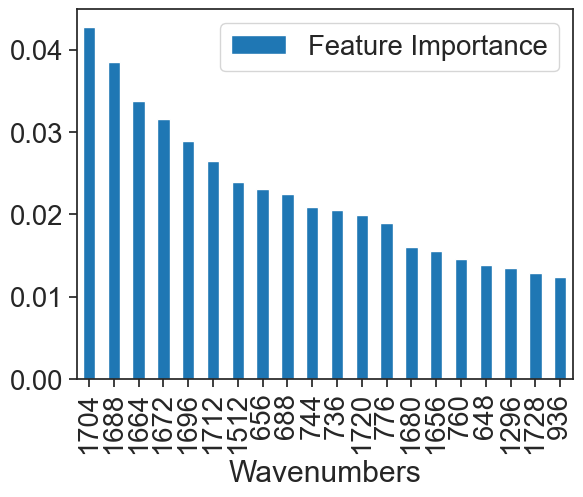

In [412]:
feature_importance_RF_feamles.sort_values(by="Feature Importance", ascending=False).head(20).plot.bar(x="Wavenumbers", y="Feature Importance")

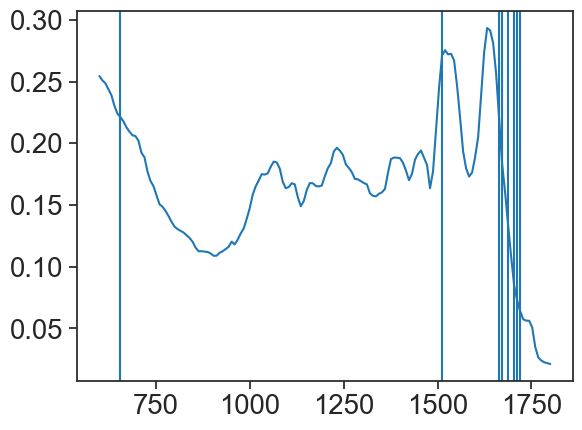

In [413]:
fig, ax = plt.subplots()
ax.plot(wavenumbers, np.mean(X_res, axis=0))
ax.axvline(1704)
ax.axvline(1688)
ax.axvline(1664)
ax.axvline(1672)
ax.axvline(1712)
ax.axvline(1512)
ax.axvline(656)
ax.axvline(1720)

ax.axvline(1672)

In [ ]:

scores_2100 = cross_val_score(RandomForestClassifier(), savgol_filter(Xf_th_train, window_length=21,deriv=0,polyorder=2), yf_th_train, cv=10)
scores_2100

In [ ]:
scores_1750 = cross_val_score(RandomForestClassifier(), savgol_filter(Xf_th_train, window_length=21,deriv=0,polyorder=2), yf_th_train, cv=10)
scores_1750

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([scores_2100,scores_1750],positions=[1,2])

In [414]:
from xgboost import XGBClassifier

In [415]:
model = XGBClassifier(objective='multi:softprob', num_class=3)

In [416]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y_enconded = enc.fit_transform(y_res)

In [417]:
model.fit(X_res,y_enconded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [418]:
y_pred = model.predict(Xf_th_test)

In [419]:
y_test_encoded = enc.transform(yf_th_test)

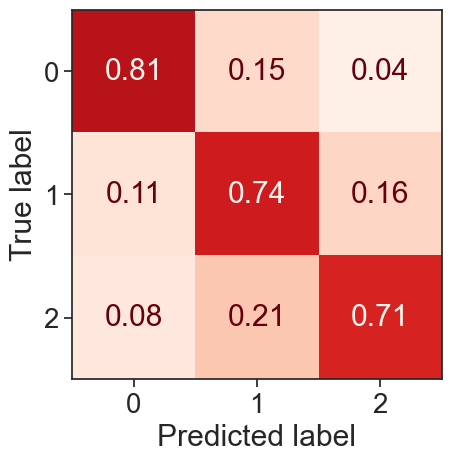

In [420]:
fig, ax = plt.subplots()

disp = ConfusionMatrixDisplay.from_predictions(y_test_encoded,y_pred,ax=ax, normalize='true', values_format='.2f', im_kw={'vmin':0, 'vmax':1},colorbar=False, cmap=plt.cm.Reds)

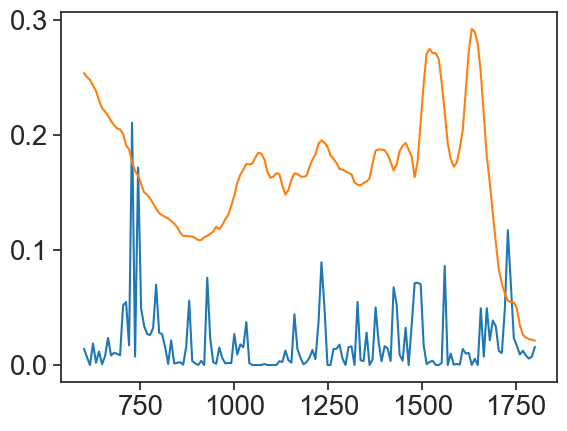

In [421]:
plt.plot(wavenumbers, (model.feature_importances_)*3)
plt.plot(wavenumbers, np.mean(X_females_thorax_low, axis=0))

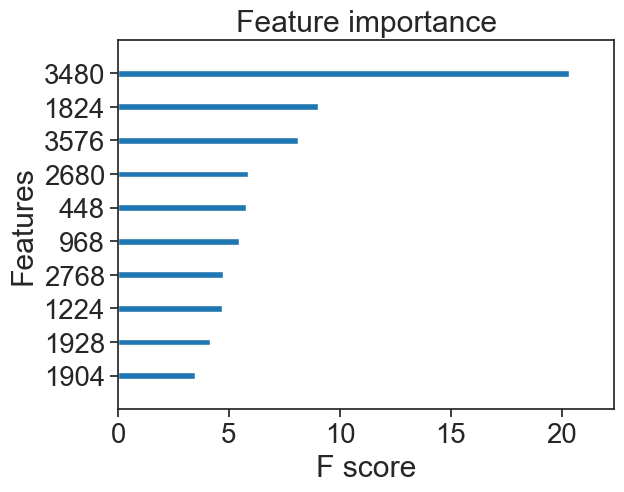

In [381]:
from xgboost import plot_importance

plot_importance(model, max_num_features=10, importance_type='gain', values_format="{v:.2f}", show_values=False, grid=False)
plt.show()

In [80]:
tsetse_data = pd.read_csv("../data/processed/TseTse_processed_wo_outliers.csv")
tsetse_females_thorax = tsetse_data.loc[(tsetse_data['Sex'] == 'f') & (tsetse_data['Tissue'] == 'Thorax')]

tsetse_females_head = tsetse_data.loc[(tsetse_data['Sex'] == 'f') & (tsetse_data['Tissue'] == 'Head')]

In [81]:
X_females_thorax = tsetse_females_thorax.loc[:,"4000":"402"]
X_females_head = tsetse_females_head.loc[:,"4000":"402"]

y_females_thorax = tsetse_females_thorax.loc[:,"Age"]
y_females_head = tsetse_females_head.loc[:,"Age"]

In [82]:
X_females_thorax = X_females_thorax[X_females_thorax.columns[::4]]
X_females_head = X_females_head[X_females_head.columns[::4]]

In [83]:
waveNumslist = X_females_thorax.columns.values.tolist()
wavenumbers = [int(x) for x in waveNumslist]

In [84]:
colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.03, 0.5, 'Absorbance (a.u)')

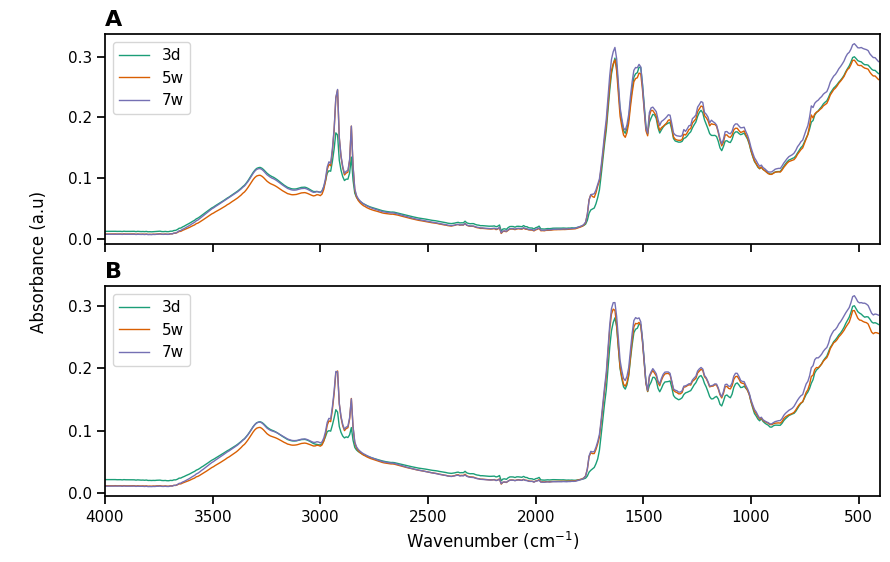

In [86]:
sn.set_context('notebook')
fig, (ax,ax2) = plt.subplots(2,1,figsize=(10,6),sharex=True)

# females

for i, c in zip(np.unique(y_females_head), colors):
    sn.lineplot(x=wavenumbers, y=np.mean(X_females_head[y_females_head == i], axis=0), label=i, color=c, linewidth=1,ax=ax)
plt.legend()


for i, c in zip(np.unique(y_females_thorax), colors):
    sn.lineplot(x=wavenumbers, y=np.mean(X_females_thorax[y_females_thorax == i], axis=0), label=i, color=c, linewidth=1,ax=ax2)
plt.legend()

ax.set_title("A",fontsize=16, loc='left', fontweight='bold')
ax2.set_title("B",fontsize=16, loc='left',fontweight='bold')
ax2.set_xlabel("Wavenumber (cm$^{-1}$)",fontsize=12)
#ax2.set_ylabel("Absorbance (a.u)",fontsize=10)
ax.set_xlim(4000,401)

ax.annotate("Absorbance (a.u)",(0.03,0.5),xycoords='figure fraction',rotation=90,verticalalignment='center')


# males

In [87]:
tsetse_data = pd.read_csv("../data/processed/TseTse_processed_wo_outliers.csv")
tsetse_males_thorax = tsetse_data.loc[(tsetse_data['Sex'] == 'm') & (tsetse_data['Tissue'] == 'Thorax')]

tsetse_males_head = tsetse_data.loc[(tsetse_data['Sex'] == 'm') & (tsetse_data['Tissue'] == 'Head')]

In [88]:
X_males_thorax = tsetse_males_thorax.loc[:,"4000":"402"]
X_males_head = tsetse_males_head.loc[:,"4000":"402"]

y_males_thorax = tsetse_males_thorax.loc[:,"Age"]
y_males_head = tsetse_males_head.loc[:,"Age"]

In [89]:
X_males_thorax = X_males_thorax[X_males_thorax.columns[::4]]
X_males_head = X_males_head[X_males_head.columns[::4]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.03, 0.5, 'Absorbance (a.u)')

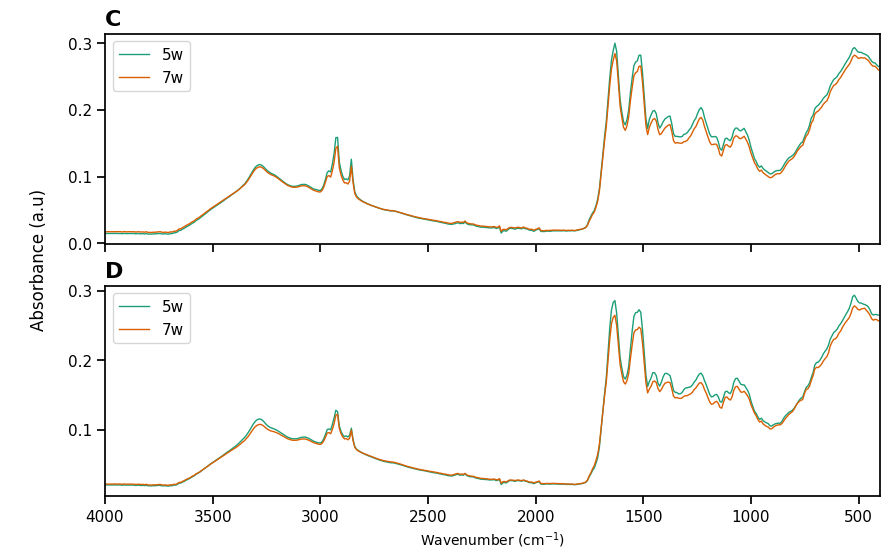

In [90]:
sn.set_context('notebook')
fig, (ax,ax2) = plt.subplots(2,1,figsize=(10,6),sharex=True)


for i, c in zip(np.unique(y_males_head), colors):
    sn.lineplot(x=wavenumbers, y=np.mean(X_males_head[y_males_head == i], axis=0), label=i, color=c, linewidth=1,ax=ax)
plt.legend()


for i, c in zip(np.unique(y_males_thorax), colors):
    sn.lineplot(x=wavenumbers, y=np.mean(X_males_thorax[y_males_thorax == i], axis=0), label=i, color=c, linewidth=1,ax=ax2)
plt.legend()

ax.set_title("C",fontsize=16, loc='left', fontweight='bold')
ax2.set_title("D",fontsize=16, loc='left',fontweight='bold')
ax2.set_xlabel("Wavenumber (cm$^{-1}$)",fontsize=10)
#ax2.set_ylabel("Absorbance (a.u)",fontsize=10)
ax.set_xlim(4000,401)
ax.annotate("Absorbance (a.u)",(0.03,0.5),xycoords='figure fraction',rotation=90,verticalalignment='center')

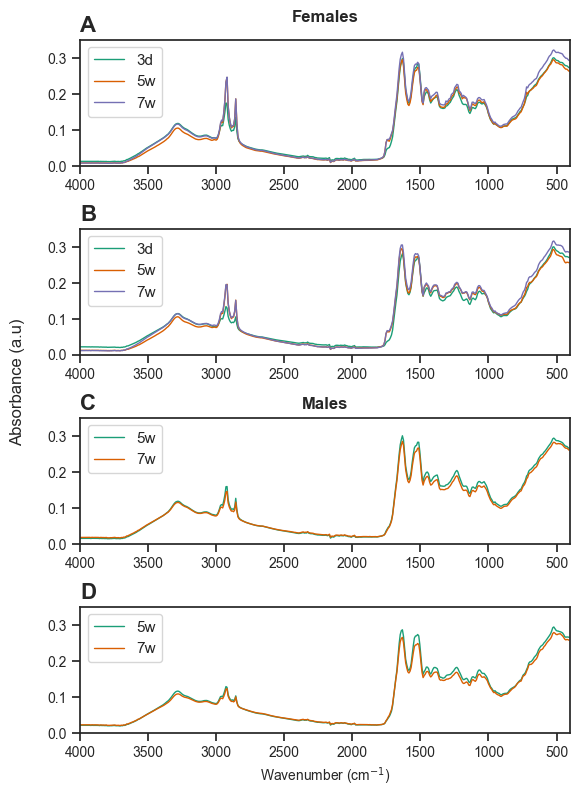

In [142]:
rc={'font.size': 12,
    "font.family":"Arial",
    "axes.labelsize":10,
    'xtick.labelsize':10,
    'ytick.labelsize':10}

sn.set_style("ticks")
sn.set_context('notebook', rc=rc)

fig = plt.figure(layout=None,figsize=(7,9))
gs = fig.add_gridspec(nrows=4, ncols=1, left=0.05, right=0.75,
                      hspace=0.5, wspace=0.1)


ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])
ax4 = fig.add_subplot(gs[3,0])


# females

for i, c in zip(np.unique(y_females_head), colors):
    sn.lineplot(x=wavenumbers, y=np.mean(X_females_head[y_females_head == i], axis=0), label=i, color=c, linewidth=1,ax=ax1)
#plt.legend()


for i, c in zip(np.unique(y_females_thorax), colors):
    sn.lineplot(x=wavenumbers, y=np.mean(X_females_thorax[y_females_thorax == i], axis=0), label=i, color=c, linewidth=1,ax=ax2)
#plt.legend()

ax.set_title("A",fontsize=16, loc='left', fontweight='bold')
ax2.set_title("B",fontsize=16, loc='left',fontweight='bold')
#ax2.set_xlabel("Wavenumber (cm$^{-1}$)",fontsize=12)
#ax2.set_ylabel("Absorbance (a.u)",fontsize=10)


ax.annotate("Absorbance (a.u)",(0.03,0.5),xycoords='figure fraction',rotation=90,verticalalignment='center')


 # males

for i, c in zip(np.unique(y_males_head), colors):
    sn.lineplot(x=wavenumbers, y=np.mean(X_males_head[y_males_head == i], axis=0), label=i, color=c, linewidth=1,ax=ax3)
#plt.legend()


for i, c in zip(np.unique(y_males_thorax), colors):
    sn.lineplot(x=wavenumbers, y=np.mean(X_males_thorax[y_males_thorax == i], axis=0), label=i, color=c, linewidth=1,ax=ax4)
#plt.legend()

ax1.set_title("A",fontsize=16, loc='left', fontweight='bold')
ax2.set_title("B",fontsize=16, loc='left',fontweight='bold')
ax3.set_title("C",fontsize=16, loc='left', fontweight='bold')
ax4.set_title("D",fontsize=16, loc='left',fontweight='bold')
ax4.set_xlabel("Wavenumber (cm$^{-1}$)")

ax1.set_xlim(4000,401)
ax2.set_xlim(4000,401)
ax3.set_xlim(4000,401)
ax4.set_xlim(4000,401)

ax1.set_ylim(0,0.35)
ax2.set_ylim(0,0.35)
ax3.set_ylim(0,0.35)
ax4.set_ylim(0,0.35)

#ax2.set_ylabel("Absorbance (a.u)",fontsize=10)
ax.set_xlim(4000,401)
fig.text(x=-0.05,y=0.5,s="Absorbance (a.u)", rotation=90,verticalalignment='center')

fig.text(x=0.4,y=0.9,s="Females",ha='center',fontweight='bold')
fig.text(x=0.4,y=0.47,s="Males",ha='center',fontweight='bold')

#fig.text(x=-0.06,y=0.58, s='Sex\nprediction', horizontalalignment='center'

plt.savefig("../results/plots/mean.png", dpi=300, bbox_inches="tight")


(4000.0, 400.0, -5.022557471264302e-05, 0.31812910488505747)

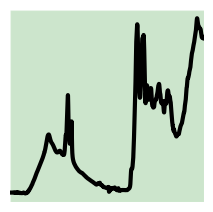

In [498]:
X_females_thorax = tsetse_females_thorax.loc[:,"4000":"402"]
waveNumslist = X_females_thorax.columns.values.tolist()
wavenumbers = [int(x) for x in waveNumslist]

fig, ax = plt.subplots(figsize=(2.5,2.5))
sn.lineplot(x=wavenumbers, y=np.mean(X_females_thorax, axis=0), ax=ax, color='k',linewidth=3)
ax.set_xlim(4000, 400)
ax.axvspan(xmin=400, xmax=4000,facecolor='g', alpha=0.2)
plt.axis('off')



(4000.0, 400.0, -5.022557471264302e-05, 0.31812910488505747)

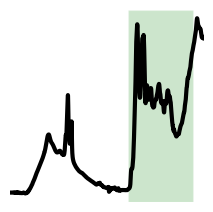

In [499]:
fig, ax = plt.subplots(figsize=(2.5,2.5))
sn.lineplot(x=wavenumbers, y=np.mean(X_females_thorax, axis=0), ax=ax, color='k',linewidth=3)
ax.set_xlim(4000, 400)
ax.axvspan(xmin=600, xmax=1800,facecolor='g', alpha=0.2)
plt.axis('off')

(4000.0, 400.0, -5.022557471264302e-05, 0.31812910488505747)

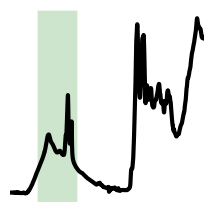

In [500]:
fig, ax = plt.subplots(figsize=(2.5,2.5))
sn.lineplot(x=wavenumbers, y=np.mean(X_females_thorax, axis=0), ax=ax, color='k',linewidth=3)
ax.set_xlim(4000, 400)
ax.axvspan(xmin=2750, xmax=3500,facecolor='g', alpha=0.2)
plt.axis('off')

(4000.0, 400.0, -5.022557471264302e-05, 0.31812910488505747)

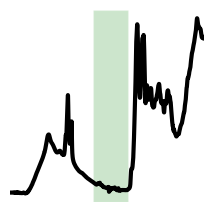

In [501]:
fig, ax = plt.subplots(figsize=(2.5,2.5))
sn.lineplot(x=wavenumbers, y=np.mean(X_females_thorax, axis=0), ax=ax, color='k',linewidth=3)
ax.set_xlim(4000, 400)
ax.axvspan(xmin=1800, xmax=2450,facecolor='g', alpha=0.2)
plt.axis('off')

(4000.0, 400.0, -5.022557471264302e-05, 0.31812910488505747)

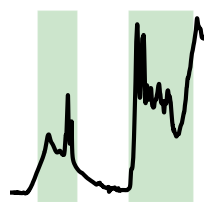

In [502]:
fig, ax = plt.subplots(figsize=(2.5,2.5))
sn.lineplot(x=wavenumbers, y=np.mean(X_females_thorax, axis=0), ax=ax, color='k',linewidth=3)
ax.set_xlim(4000, 400)
ax.axvspan(xmin=600, xmax=1800,facecolor='g', alpha=0.2)
ax.axvspan(xmin=2750, xmax=3500,facecolor='g', alpha=0.2)
plt.axis('off')